<a href="https://colab.research.google.com/github/davyhallihan/homework4105ml/blob/main/4105hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [362]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [363]:
# Read Dataset
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/4105a1/Housing.csv')

# Split Into Training/Validation
from sklearn.model_selection import train_test_split
np.random.seed(5)

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Problem 1 Prep

In [364]:
def cost(explanatory, truth, theta, records):
    predictionlist = np.dot(explanatory, theta)
    serrorlist = np.square(np.subtract(predictionlist, truth))
    cost = 0.5 * np.sum(serrorlist) / records
    return cost

def gradient_descent(explanatory_train, truth_train, records_train, explanatory_val, truth_val, records_val, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    val_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = np.dot(explanatory_train, theta)
        errors = np.subtract(predictions, truth_train)
        sum_delta = (alpha / records_train) * np.dot(explanatory_train.transpose(), errors)
        theta = theta - sum_delta
        cost_history[i] = cost(explanatory_train, truth_train, theta, records_train)
        val_cost_history[i] = cost(explanatory_val, truth_val, theta, records_val)

    return theta, cost_history, val_cost_history

# Problem 1a

In [365]:
truth_train = df_train.values[:, 0]
records_train = len(truth_train)
bias_train = np.ones((records_train, 1))

truth_val = df_test.values[:, 0]
records_val = len(truth_val)
bias_val = np.ones((records_val, 1))


area_train = df_train.values[:, 1].reshape(records_train, 1)
beds_train = df_train.values[:, 2].reshape(records_train, 1)
baths_train = df_train.values[:, 3].reshape(records_train, 1)
stories_train = df_train.values[:, 4].reshape(records_train, 1)
parking_train = df_train.values[:, 10].reshape(records_train, 1)

area_val = df_test.values[:, 1].reshape(records_val, 1)
beds_val = df_test.values[:, 2].reshape(records_val, 1)
baths_val = df_test.values[:, 3].reshape(records_val, 1)
stories_val = df_test.values[:, 4].reshape(records_val, 1)
parking_val = df_test.values[:, 10].reshape(records_val, 1)




#display(prepparking)



In [366]:
# Prepare All Explanatory Variables for Input
explanatory_train = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train))
explanatory_val = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val))

# Output Variables
theta = np.zeros(6)

# Tuning Variables
iterations = 100
alpha = 0.000000005
#alpha = 0.01
#alpha = 0.1

# Calculate initial cost
initial_cost = cost(explanatory_train, truth_train, theta, records_train)
print('All variables Starting cost =', initial_cost)

# Train
theta, cost_history, val_cost_history = gradient_descent(explanatory_train, truth_train, records_train, explanatory_val, truth_val, records_val, theta, alpha, iterations )
print('All variables final value of theta =', theta)
#print('All variables cost_history =', cost_history)

All variables Starting cost = 12966317325103.15
All variables final value of theta = [0.3095383634760592 865.5497935028552 1.0817455264029214 0.555422766428934
 0.8369485764434571 0.23843776579520248]


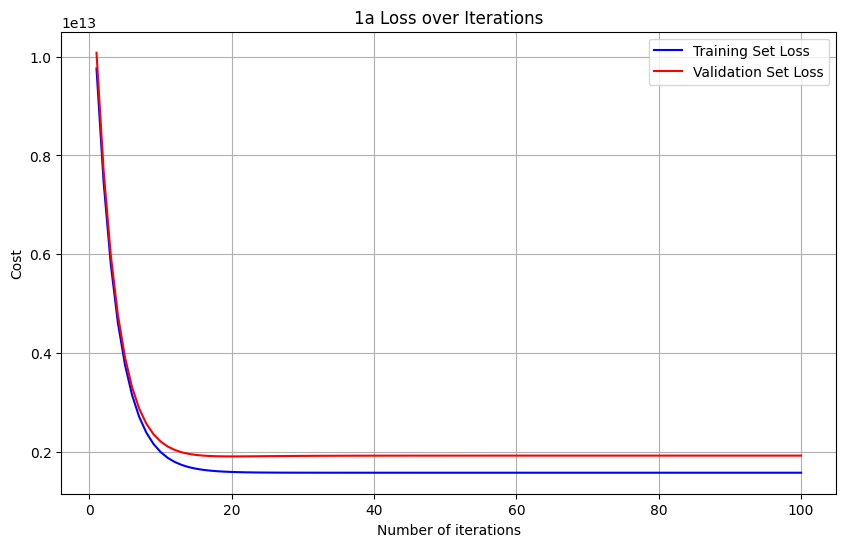

In [367]:
# All Loss Plot
plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Training Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.plot(range(1, iterations + 1), val_cost_history, color='red', label='Validation Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('1a Loss over Iterations')

# Show the plot
plt.legend()
plt.show()

# Problem 1b

In [368]:
#using truth, records, bias, area, beds, baths, stories, parking from problem 1a
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

def trinary_map(x):
    return x.map({'unfurnished': 0, 'semi-furnished': 0.5, 'furnished' : 1})

binarymap =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
trinarymap = ['furnishingstatus']

df_train[binarymap] = df_train[binarymap].apply(binary_map)
df_test[binarymap] = df_test[binarymap].apply(binary_map)

df_train[trinarymap] = df_train[trinarymap].apply(trinary_map)
df_test[trinarymap] = df_test[trinarymap].apply(trinary_map)

mainrd_train = df_train.values[:, 5].reshape(records_train, 1)
guest_train = df_train.values[:, 6].reshape(records_train, 1)
basement_train = df_train.values[:, 7].reshape(records_train, 1)
hotwater_train = df_train.values[:, 8].reshape(records_train, 1)
hvac_train = df_train.values[:, 9].reshape(records_train, 1)
prefarea_train = df_train.values[:, 11].reshape(records_train, 1)
furnishing_train = df_train.values[:, 12].reshape(records_train, 1)

mainrd_val = df_test.values[:, 5].reshape(records_val, 1)
guest_val = df_test.values[:, 6].reshape(records_val, 1)
basement_val = df_test.values[:, 7].reshape(records_val, 1)
hotwater_val = df_test.values[:, 8].reshape(records_val, 1)
hvac_val = df_test.values[:, 9].reshape(records_val, 1)
prefarea_val = df_test.values[:, 11].reshape(records_val, 1)
furnishing_val = df_test.values[:, 12].reshape(records_val, 1)


In [369]:
# Prepare All Explanatory Variables for Input
explanatory_train = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train, mainrd_train, guest_train, basement_train, hotwater_train, hvac_train, prefarea_train, furnishing_train))
explanatory_val = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val, mainrd_val, guest_val, basement_val, hotwater_val, hvac_val, prefarea_val, furnishing_val))

# Output Variables
theta = np.zeros(13)

# Tuning Variables
iterations = 100
alpha = 0.000000005
#alpha = 0.01
#alpha = 0.1

# Calculate initial cost
initial_cost = cost(explanatory_train, truth_train, theta, records_train)
print('All variables Starting cost =', initial_cost)

# Train
theta, cost_history, val_cost_history = gradient_descent(explanatory_train, truth_train, records_train, explanatory_val, truth_val, records_val, theta, alpha, iterations)
print('All variables final value of theta =', theta)
#print('All variables cost_history =', cost_history)

All variables Starting cost = 12966317325103.15
All variables final value of theta = [0.3095383373223732 865.5497108446856 1.0817454441682919
 0.5554227299350019 0.8369485214428299 0.2384377487803524
 0.27663661798839695 0.0949725428350095 0.15347532893091462
 0.03787049459600527 0.19061824958080748 0.10623742425880225
 0.1823259249057264]


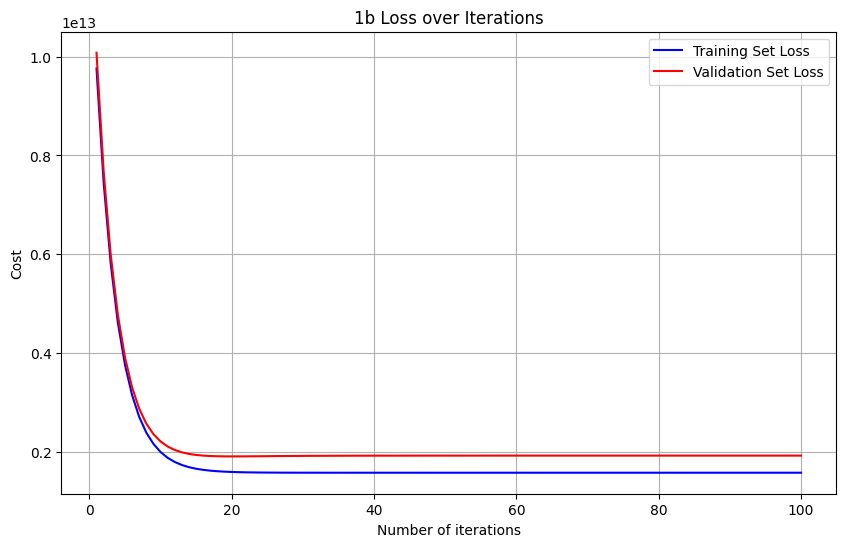

In [370]:
# All Loss Plot
plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Training Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.plot(range(1, iterations + 1), val_cost_history, color='red', label='Validation Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('1b Loss over Iterations')

# Show the plot
plt.legend()
plt.show()

# Problem 2 Prep

In [371]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MinMax = MinMaxScaler()
Standard = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

truth_minmaxt = truth_train
truth_minmaxv = truth_val
truth_stdt = truth_train
truth_stdv = truth_val

df_minmaxt = df_train
df_minmaxt[num_vars] = MinMax.fit_transform(df_train[num_vars])
truth_minmaxt = df_minmaxt.values[:, 0]

df_minmaxv = df_test
df_minmaxv[num_vars] = MinMax.fit_transform(df_test[num_vars])
truth_minmaxv = df_minmaxv.values[:, 0]

df_stdt = df_train
df_stdt[num_vars] = Standard.fit_transform(df_train[num_vars])
#truth_stdt = df_stdt.values[:, 0]

df_stdv = df_test
df_stdv[num_vars] = MinMax.fit_transform(df_test[num_vars])
#truth_stdv = df_stdv.values[:, 0]


# Problem 2a

In [372]:
area_train = df_minmaxt.values[:, 1].reshape(records_train, 1)
beds_train = df_minmaxt.values[:, 2].reshape(records_train, 1)
baths_train = df_minmaxt.values[:, 3].reshape(records_train, 1)
stories_train = df_minmaxt.values[:, 4].reshape(records_train, 1)
parking_train = df_minmaxt.values[:, 10].reshape(records_train, 1)

area_val = df_minmaxv.values[:, 1].reshape(records_val, 1)
beds_val = df_minmaxv.values[:, 2].reshape(records_val, 1)
baths_val = df_minmaxv.values[:, 3].reshape(records_val, 1)
stories_val = df_minmaxv.values[:, 4].reshape(records_val, 1)
parking_val = df_minmaxv.values[:, 10].reshape(records_val, 1)

# Prepare All Explanatory Variables for Input
explanatory_train = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train))
explanatory_val = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val))

# Output Variables
theta = np.zeros(6)

# Tuning Variables
iterations = 100
alpha = 0.05
#alpha = 0.01
#alpha = 0.1

# Calculate initial cost
initial_cost = cost(explanatory_train, truth_minmaxt, theta, records_train)
print('All variables Starting cost =', initial_cost)

# Train
theta, cost_history, val_cost_history = gradient_descent(explanatory_train, truth_minmaxt, records_train, explanatory_val, truth_minmaxv, records_val, theta, alpha, iterations)
print('All variables final value of theta =', theta)
#print('All variables cost_history =', cost_history)

All variables Starting cost = 0.0462741253341817
All variables final value of theta = [0.25879182 0.06199999 0.01213309 0.05305414 0.03879891 0.02393982]


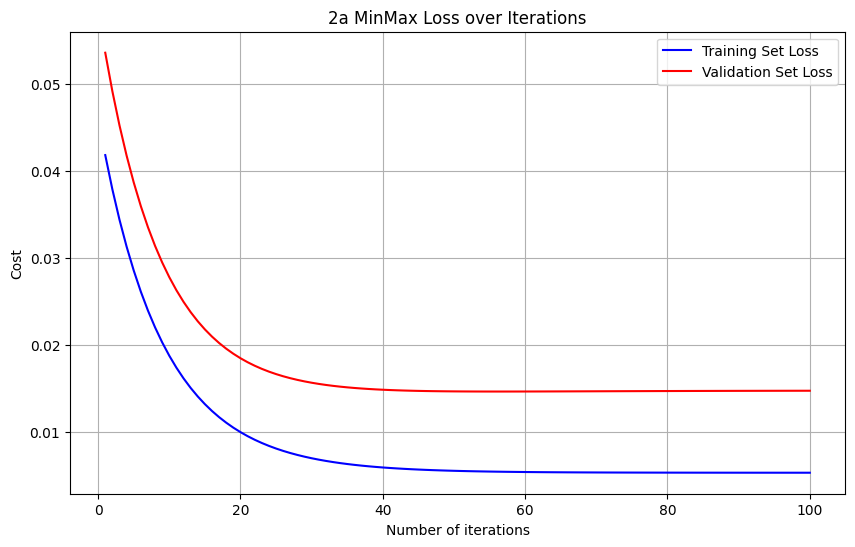

In [373]:
# All Loss Plot
plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Training Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.plot(range(1, iterations + 1), val_cost_history, color='red', label='Validation Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('2a MinMax Loss over Iterations')

# Show the plot
plt.legend()
plt.show()

In [374]:
area_train = df_stdt.values[:, 1].reshape(records_train, 1)
beds_train = df_stdt.values[:, 2].reshape(records_train, 1)
baths_train = df_stdt.values[:, 3].reshape(records_train, 1)
stories_train = df_stdt.values[:, 4].reshape(records_train, 1)
parking_train = df_stdt.values[:, 10].reshape(records_train, 1)

area_val = df_stdv.values[:, 1].reshape(records_val, 1)
beds_val = df_stdv.values[:, 2].reshape(records_val, 1)
baths_val = df_stdv.values[:, 3].reshape(records_val, 1)
stories_val = df_stdv.values[:, 4].reshape(records_val, 1)
parking_val = df_stdv.values[:, 10].reshape(records_val, 1)

# Prepare All Explanatory Variables for Input
explanatory_train = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train))
explanatory_val = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val))

# Output Variables
theta = np.zeros(6)

# Tuning Variables
iterations = 100
alpha = 0.05
#alpha = 0.01
#alpha = 0.05

# Calculate initial cost
initial_cost = cost(explanatory_train, truth_stdt, theta, records_train)
print('All variables Starting cost =', initial_cost)

# Train
theta, cost_history, val_cost_history = gradient_descent(explanatory_train, truth_stdt, records_train, explanatory_val, truth_stdv, records_val, theta, alpha, iterations)
print('All variables final value of theta =', theta)
#print('All variables cost_history =', cost_history)

All variables Starting cost = 12966317325103.15
All variables final value of theta = [4728684.556267709 716099.8547243074 140137.22368428126 612775.3590136686
 448127.4233831914 276504.94840272475]


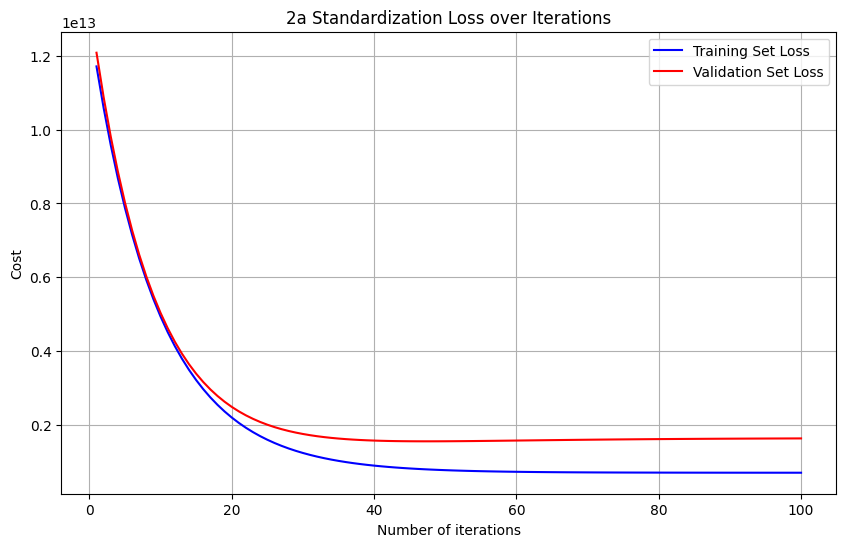

In [375]:
# All Loss Plot
plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Training Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.plot(range(1, iterations + 1), val_cost_history, color='red', label='Validation Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('2a Standardization Loss over Iterations')

# Show the plot
plt.legend()
plt.show()

# Problem 2b

In [376]:
area_train = df_minmaxt.values[:, 1].reshape(records_train, 1)
beds_train = df_minmaxt.values[:, 2].reshape(records_train, 1)
baths_train = df_minmaxt.values[:, 3].reshape(records_train, 1)
stories_train = df_minmaxt.values[:, 4].reshape(records_train, 1)
parking_train = df_minmaxt.values[:, 10].reshape(records_train, 1)
mainrd_train = df_minmaxt.values[:, 5].reshape(records_train, 1)
guest_train = df_minmaxt.values[:, 6].reshape(records_train, 1)
basement_train = df_minmaxt.values[:, 7].reshape(records_train, 1)
hotwater_train = df_minmaxt.values[:, 8].reshape(records_train, 1)
hvac_train = df_minmaxt.values[:, 9].reshape(records_train, 1)
prefarea_train = df_minmaxt.values[:, 11].reshape(records_train, 1)
furnishing_train = df_minmaxt.values[:, 12].reshape(records_train, 1)

area_val = df_minmaxv.values[:, 1].reshape(records_val, 1)
beds_val = df_minmaxv.values[:, 2].reshape(records_val, 1)
baths_val = df_minmaxv.values[:, 3].reshape(records_val, 1)
stories_val = df_minmaxv.values[:, 4].reshape(records_val, 1)
parking_val = df_minmaxv.values[:, 10].reshape(records_val, 1)
mainrd_val = df_minmaxv.values[:, 5].reshape(records_val, 1)
guest_val = df_minmaxv.values[:, 6].reshape(records_val, 1)
basement_val = df_minmaxv.values[:, 7].reshape(records_val, 1)
hotwater_val = df_minmaxv.values[:, 8].reshape(records_val, 1)
hvac_val = df_minmaxv.values[:, 9].reshape(records_val, 1)
prefarea_val = df_minmaxv.values[:, 11].reshape(records_val, 1)
furnishing_val = df_minmaxv.values[:, 12].reshape(records_val, 1)

# Prepare All Explanatory Variables for Input
explanatory_train = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train, mainrd_train, guest_train, basement_train, hotwater_train, hvac_train, prefarea_train, furnishing_train))
explanatory_val = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val, mainrd_val, guest_val, basement_val, hotwater_val, hvac_val, prefarea_val, furnishing_val))

# Output Variables
theta = np.zeros(13)

# Tuning Variables
iterations = 100
alpha = 0.05
#alpha = 0.01
#alpha = 0.1

# Calculate initial cost
initial_cost = cost(explanatory_train, truth_minmaxt, theta, records_train)
print('All variables Starting cost =', initial_cost)

# Train
theta, cost_history, val_cost_history = gradient_descent(explanatory_train, truth_minmaxt, records_train, explanatory_val, truth_minmaxv, records_val, theta, alpha, iterations)
print('All variables final value of theta =', theta)
#print('All variables cost_history =', cost_history)

All variables Starting cost = 0.0462741253341817
All variables final value of theta = [0.11699162 0.03952436 0.00874957 0.04699199 0.03138744 0.01728893
 0.08648178 0.02672023 0.03397304 0.02215659 0.05512203 0.04419256
 0.04865252]


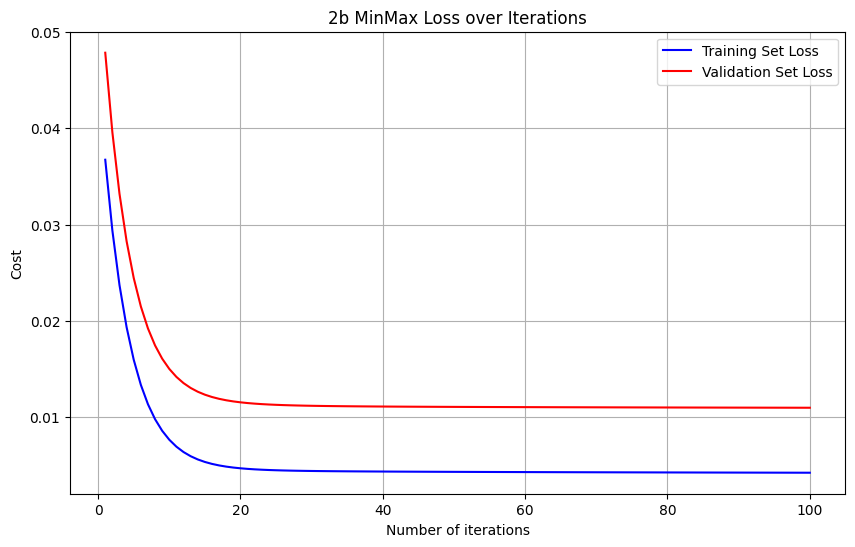

In [377]:
# All Loss Plot
plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Training Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.plot(range(1, iterations + 1), val_cost_history, color='red', label='Validation Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('2b MinMax Loss over Iterations')

# Show the plot
plt.legend()
plt.show()

In [378]:
area_train = df_stdt.values[:, 1].reshape(records_train, 1)
beds_train = df_stdt.values[:, 2].reshape(records_train, 1)
baths_train = df_stdt.values[:, 3].reshape(records_train, 1)
stories_train = df_stdt.values[:, 4].reshape(records_train, 1)
parking_train = df_stdt.values[:, 10].reshape(records_train, 1)
mainrd_train = df_stdt.values[:, 5].reshape(records_train, 1)
guest_train = df_stdt.values[:, 6].reshape(records_train, 1)
basement_train = df_stdt.values[:, 7].reshape(records_train, 1)
hotwater_train = df_stdt.values[:, 8].reshape(records_train, 1)
hvac_train = df_stdt.values[:, 9].reshape(records_train, 1)
prefarea_train = df_stdt.values[:, 11].reshape(records_train, 1)
furnishing_train = df_stdt.values[:, 12].reshape(records_train, 1)

area_val = df_stdv.values[:, 1].reshape(records_val, 1)
beds_val = df_stdv.values[:, 2].reshape(records_val, 1)
baths_val = df_stdv.values[:, 3].reshape(records_val, 1)
stories_val = df_stdv.values[:, 4].reshape(records_val, 1)
parking_val = df_stdv.values[:, 10].reshape(records_val, 1)
mainrd_val = df_stdv.values[:, 5].reshape(records_val, 1)
guest_val = df_stdv.values[:, 6].reshape(records_val, 1)
basement_val = df_stdv.values[:, 7].reshape(records_val, 1)
hotwater_val = df_stdv.values[:, 8].reshape(records_val, 1)
hvac_val = df_stdv.values[:, 9].reshape(records_val, 1)
prefarea_val = df_stdv.values[:, 11].reshape(records_val, 1)
furnishing_val = df_stdv.values[:, 12].reshape(records_val, 1)

# Prepare All Explanatory Variables for Input
explanatory_train = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train, mainrd_train, guest_train, basement_train, hotwater_train, hvac_train, prefarea_train, furnishing_train))
explanatory_val = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val, mainrd_val, guest_val, basement_val, hotwater_val, hvac_val, prefarea_val, furnishing_val))

# Output Variables
theta = np.zeros(13)

# Tuning Variables
iterations = 100
alpha = 0.05
#alpha = 0.01
#alpha = 0.1

# Calculate initial cost
initial_cost = cost(explanatory_train, truth_stdt, theta, records_train)
print('All variables Starting cost =', initial_cost)

# Train
theta, cost_history, val_cost_history = gradient_descent(explanatory_train, truth_stdt, records_train, explanatory_val, truth_stdv, records_val, theta, alpha, iterations)
print('All variables final value of theta =', theta)
#print('All variables cost_history =', cost_history)

All variables Starting cost = 12966317325103.15
All variables final value of theta = [2375623.473392285 362807.6736411445 96026.90516267424 529345.9870741866
 328624.2854617477 166499.67061910947 1542242.7503127905 346066.3341555019
 496312.3913402923 317346.7866550221 773063.7644630496 572698.3948034968
 801837.3468551902]


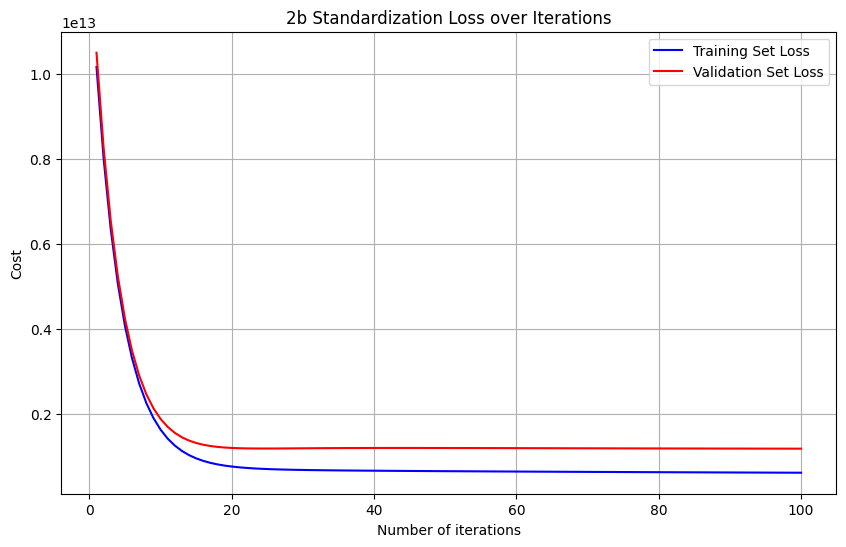

In [379]:
# All Loss Plot
plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Training Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.plot(range(1, iterations + 1), val_cost_history, color='red', label='Validation Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('2b Standardization Loss over Iterations')

# Show the plot
plt.legend()
plt.show()

# Problem 3 Prep

In [380]:
def cost_lam(explanatory, truth, theta, records, lam):
    predictionlist = np.dot(explanatory, theta)
    serrorlist = np.square(np.subtract(predictionlist, truth))
    cost = 0.5 * (np.sum(serrorlist) + lam * (np.sum(np.square(theta)) - (theta[0]**2))) / records
    return cost

def gradient_descent_lam(explanatory_train, truth_train, records_train, explanatory_val, truth_val, records_val, theta, alpha, iterations, lam):
    cost_history = np.zeros(iterations)
    val_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = np.dot(explanatory_train, theta)
        errors = np.subtract(predictions, truth_train)
        sum_delta = (alpha / records_train) * np.dot(explanatory_train.transpose(), errors)
        theta = theta * (1 - alpha * lam / records_train) - sum_delta
        cost_history[i] = cost_lam(explanatory_train, truth_train, theta, records_train, lam)
        val_cost_history[i] = cost(explanatory_val, truth_val, theta, records_val)

    return theta, cost_history, val_cost_history

# Problem 3a

In [381]:
area_train = df_minmaxt.values[:, 1].reshape(records_train, 1)
beds_train = df_minmaxt.values[:, 2].reshape(records_train, 1)
baths_train = df_minmaxt.values[:, 3].reshape(records_train, 1)
stories_train = df_minmaxt.values[:, 4].reshape(records_train, 1)
parking_train = df_minmaxt.values[:, 10].reshape(records_train, 1)

area_val = df_minmaxv.values[:, 1].reshape(records_val, 1)
beds_val = df_minmaxv.values[:, 2].reshape(records_val, 1)
baths_val = df_minmaxv.values[:, 3].reshape(records_val, 1)
stories_val = df_minmaxv.values[:, 4].reshape(records_val, 1)
parking_val = df_minmaxv.values[:, 10].reshape(records_val, 1)

# Prepare All Explanatory Variables for Input
explanatory_train = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train))
explanatory_val = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val))

# Output Variables
theta = np.zeros(6)

# Tuning Variables
iterations = 100
lam = 1.0
alpha = 0.05
#alpha = 0.01
#alpha = 0.1

# Calculate initial cost
initial_cost = cost(explanatory_train, truth_minmaxt, theta, records_train)
print('All variables Starting cost =', initial_cost)

# Train
theta, cost_history, val_cost_history = gradient_descent_lam(explanatory_train, truth_minmaxt, records_train, explanatory_val, truth_minmaxv, records_val, theta, alpha, iterations, lam)
print('All variables final value of theta =', theta)
#print('All variables cost_history =', cost_history)

All variables Starting cost = 0.0462741253341817
All variables final value of theta = [0.25813544 0.06186468 0.0121729  0.05295095 0.03872516 0.02393177]


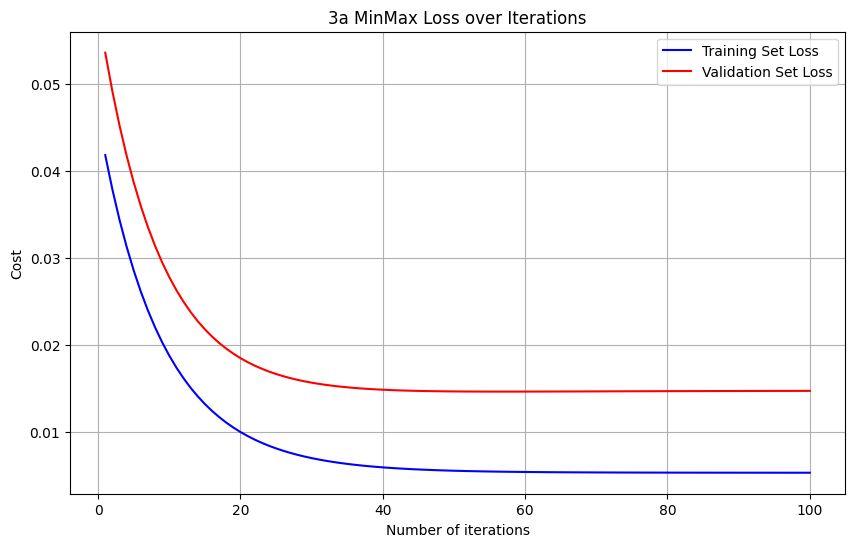

In [382]:
# All Loss Plot
plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Training Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.plot(range(1, iterations + 1), val_cost_history, color='red', label='Validation Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('3a MinMax Loss over Iterations')

# Show the plot
plt.legend()
plt.show()

In [383]:
area_train = df_stdt.values[:, 1].reshape(records_train, 1)
beds_train = df_stdt.values[:, 2].reshape(records_train, 1)
baths_train = df_stdt.values[:, 3].reshape(records_train, 1)
stories_train = df_stdt.values[:, 4].reshape(records_train, 1)
parking_train = df_stdt.values[:, 10].reshape(records_train, 1)

area_val = df_stdv.values[:, 1].reshape(records_val, 1)
beds_val = df_stdv.values[:, 2].reshape(records_val, 1)
baths_val = df_stdv.values[:, 3].reshape(records_val, 1)
stories_val = df_stdv.values[:, 4].reshape(records_val, 1)
parking_val = df_stdv.values[:, 10].reshape(records_val, 1)

# Prepare All Explanatory Variables for Input
explanatory_train = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train))
explanatory_val = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val))

# Output Variables
theta = np.zeros(6)

# Tuning Variables
iterations = 100
lam = 1.0
alpha = 0.05
#alpha = 0.01
#alpha = 0.05

# Calculate initial cost
initial_cost = cost(explanatory_train, truth_stdt, theta, records_train)
print('All variables Starting cost =', initial_cost)

# Train
theta, cost_history, val_cost_history = gradient_descent_lam(explanatory_train, truth_stdt, records_train, explanatory_val, truth_stdv, records_val, theta, alpha, iterations, lam)
print('All variables final value of theta =', theta)
#print('All variables cost_history =', cost_history)

All variables Starting cost = 12966317325103.15
All variables final value of theta = [4716691.187265745 714537.0366358107 140597.03808984396 611583.4197078116
 447275.56523236696 276411.9879814309]


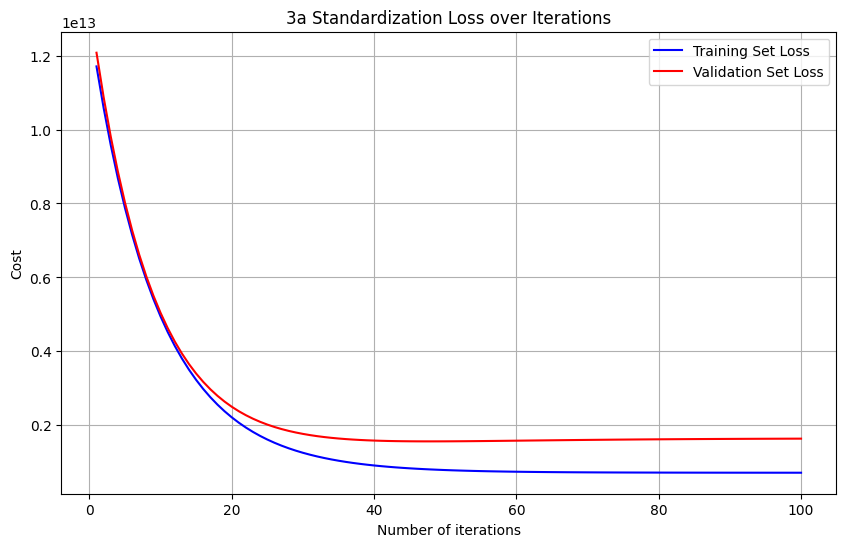

In [384]:
# All Loss Plot
plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Training Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.plot(range(1, iterations + 1), val_cost_history, color='red', label='Validation Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('3a Standardization Loss over Iterations')

# Show the plot
plt.legend()
plt.show()

# Problem 3b

In [385]:
area_train = df_minmaxt.values[:, 1].reshape(records_train, 1)
beds_train = df_minmaxt.values[:, 2].reshape(records_train, 1)
baths_train = df_minmaxt.values[:, 3].reshape(records_train, 1)
stories_train = df_minmaxt.values[:, 4].reshape(records_train, 1)
parking_train = df_minmaxt.values[:, 10].reshape(records_train, 1)
mainrd_train = df_minmaxt.values[:, 5].reshape(records_train, 1)
guest_train = df_minmaxt.values[:, 6].reshape(records_train, 1)
basement_train = df_minmaxt.values[:, 7].reshape(records_train, 1)
hotwater_train = df_minmaxt.values[:, 8].reshape(records_train, 1)
hvac_train = df_minmaxt.values[:, 9].reshape(records_train, 1)
prefarea_train = df_minmaxt.values[:, 11].reshape(records_train, 1)
furnishing_train = df_minmaxt.values[:, 12].reshape(records_train, 1)

area_val = df_minmaxv.values[:, 1].reshape(records_val, 1)
beds_val = df_minmaxv.values[:, 2].reshape(records_val, 1)
baths_val = df_minmaxv.values[:, 3].reshape(records_val, 1)
stories_val = df_minmaxv.values[:, 4].reshape(records_val, 1)
parking_val = df_minmaxv.values[:, 10].reshape(records_val, 1)
mainrd_val = df_minmaxv.values[:, 5].reshape(records_val, 1)
guest_val = df_minmaxv.values[:, 6].reshape(records_val, 1)
basement_val = df_minmaxv.values[:, 7].reshape(records_val, 1)
hotwater_val = df_minmaxv.values[:, 8].reshape(records_val, 1)
hvac_val = df_minmaxv.values[:, 9].reshape(records_val, 1)
prefarea_val = df_minmaxv.values[:, 11].reshape(records_val, 1)
furnishing_val = df_minmaxv.values[:, 12].reshape(records_val, 1)

# Prepare All Explanatory Variables for Input
explanatory_train = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train, mainrd_train, guest_train, basement_train, hotwater_train, hvac_train, prefarea_train, furnishing_train))
explanatory_val = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val, mainrd_val, guest_val, basement_val, hotwater_val, hvac_val, prefarea_val, furnishing_val))

# Output Variables
theta = np.zeros(13)

# Tuning Variables
iterations = 100
lam = 1.0
alpha = 0.05
#alpha = 0.01
#alpha = 0.1

# Calculate initial cost
initial_cost = cost(explanatory_train, truth_minmaxt, theta, records_train)
print('All variables Starting cost =', initial_cost)

# Train
theta, cost_history, val_cost_history = gradient_descent_lam(explanatory_train, truth_minmaxt, records_train, explanatory_val, truth_minmaxv, records_val, theta, alpha, iterations, lam)
print('All variables final value of theta =', theta)
print('All variables cost_history =', cost_history)

All variables Starting cost = 0.0462741253341817
All variables final value of theta = [0.11680451 0.0394662  0.00879062 0.04690157 0.03134017 0.01728795
 0.08645474 0.02668154 0.03398516 0.02204927 0.05501154 0.04409286
 0.04864353]
All variables cost_history = [0.03673781 0.02938201 0.02370734 0.01932885 0.01594977 0.01334133
 0.01132717 0.00977131 0.00856894 0.00763923 0.00691986 0.0063628
 0.005931   0.00559589 0.00533543 0.00513263 0.00497438 0.00485058
 0.00475343 0.00467689 0.00461633 0.00456816 0.00452961 0.00449854
 0.00447329 0.00445258 0.00443544 0.00442108 0.00440892 0.00439849
 0.00438944 0.00438149 0.00437443 0.00436807 0.0043623  0.00435701
 0.00435211 0.00434754 0.00434326 0.00433921 0.00433536 0.0043317
 0.00432819 0.00432483 0.00432159 0.00431846 0.00431543 0.0043125
 0.00430965 0.00430689 0.0043042  0.00430158 0.00429902 0.00429652
 0.00429408 0.0042917  0.00428936 0.00428708 0.00428484 0.00428264
 0.00428049 0.00427837 0.0042763  0.00427425 0.00427225 0.00427027
 0.0

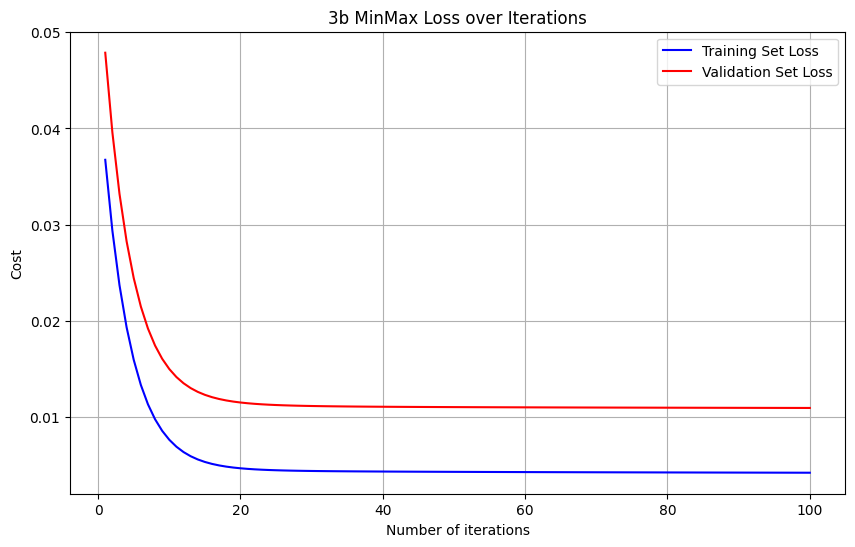

In [386]:
# All Loss Plot
plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Training Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.plot(range(1, iterations + 1), val_cost_history, color='red', label='Validation Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('3b MinMax Loss over Iterations')

# Show the plot
plt.legend()
plt.show()

In [387]:
area_train = df_stdt.values[:, 1].reshape(records_train, 1)
beds_train = df_stdt.values[:, 2].reshape(records_train, 1)
baths_train = df_stdt.values[:, 3].reshape(records_train, 1)
stories_train = df_stdt.values[:, 4].reshape(records_train, 1)
parking_train = df_stdt.values[:, 10].reshape(records_train, 1)
mainrd_train = df_stdt.values[:, 5].reshape(records_train, 1)
guest_train = df_stdt.values[:, 6].reshape(records_train, 1)
basement_train = df_stdt.values[:, 7].reshape(records_train, 1)
hotwater_train = df_stdt.values[:, 8].reshape(records_train, 1)
hvac_train = df_stdt.values[:, 9].reshape(records_train, 1)
prefarea_train = df_stdt.values[:, 11].reshape(records_train, 1)
furnishing_train = df_stdt.values[:, 12].reshape(records_train, 1)

area_val = df_stdv.values[:, 1].reshape(records_val, 1)
beds_val = df_stdv.values[:, 2].reshape(records_val, 1)
baths_val = df_stdv.values[:, 3].reshape(records_val, 1)
stories_val = df_stdv.values[:, 4].reshape(records_val, 1)
parking_val = df_stdv.values[:, 10].reshape(records_val, 1)
mainrd_val = df_stdv.values[:, 5].reshape(records_val, 1)
guest_val = df_stdv.values[:, 6].reshape(records_val, 1)
basement_val = df_stdv.values[:, 7].reshape(records_val, 1)
hotwater_val = df_stdv.values[:, 8].reshape(records_val, 1)
hvac_val = df_stdv.values[:, 9].reshape(records_val, 1)
prefarea_val = df_stdv.values[:, 11].reshape(records_val, 1)
furnishing_val = df_stdv.values[:, 12].reshape(records_val, 1)

# Prepare All Explanatory Variables for Input
explanatory_train = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train, mainrd_train, guest_train, basement_train, hotwater_train, hvac_train, prefarea_train, furnishing_train))
explanatory_val = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val, mainrd_val, guest_val, basement_val, hotwater_val, hvac_val, prefarea_val, furnishing_val))

# Output Variables
theta = np.zeros(13)

# Tuning Variables
iterations = 100
lam = 1.0
alpha = 0.05
#alpha = 0.01
#alpha = 0.1

# Calculate initial cost
initial_cost = cost(explanatory_train, truth_stdt, theta, records_train)
print('All variables Starting cost =', initial_cost)

# Train
theta, cost_history, val_cost_history = gradient_descent_lam(explanatory_train, truth_stdt, records_train, explanatory_val, truth_stdv, records_val, theta, alpha, iterations, lam)
print('All variables final value of theta =', theta)
#print('All variables cost_history =', cost_history)

All variables Starting cost = 12966317325103.15
All variables final value of theta = [2370831.058286613 362318.5750962509 96417.15315130269 528238.5635191996
 328182.7840943295 166496.24640257563 1541881.8013927126 345992.6307703969
 497102.0710326213 315924.5531382512 772034.6705845451 571991.9503391559
 802049.0863674274]


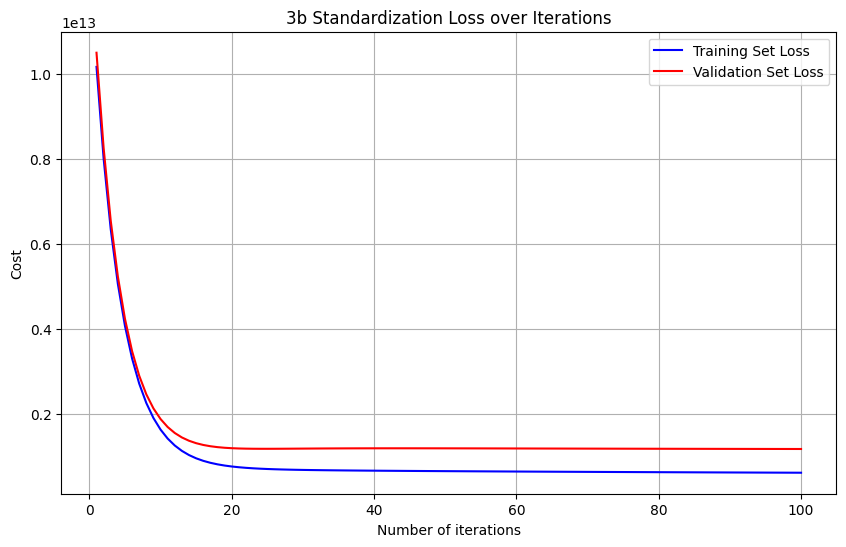

In [388]:
# All Loss Plot
plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Training Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.plot(range(1, iterations + 1), val_cost_history, color='red', label='Validation Set Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('3b Standardization Loss over Iterations')

# Show the plot
plt.legend()
plt.show()